# 深度學習入門

我們先載入這個章節範例程式碼中會使用到的第三方套件、模組或者其中的部分類別、函式。

In [1]:
from pyvizml import CreateNBAData
from pyvizml import ImshowSubplots
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import datasets
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split

## 什麼是深度學習

深度學習是機器學習領域中的一個分支，以集合概念來說明的話，深度學習包含於機器學習之中，是機器學習集合的子集合。深度學習使用連續且多層的數值轉換從訓練資料中同時進行特徵工程（Feature engineering）以及係數 $w$ 的最適化，與機器學習最大的差異點在於係數的個數是使用者**直接**或者**間接**所決定。面對數值或類別的預測任務，若是採用機器學習技巧，係數**直接**由特徵矩陣 $X$ 的欄位個數決定；然而若採用深度學習的手法，係數會改由深度（Depth）、或者稱為層數（Number of layers）決定，換言之，使用者乃是透過結構層數**間接**地決定。簡言之，我們可以將深度學習視為一種不需要使用者直接進行「特徵工程」（Feature engineering）的最適化方法，使用者透過定義層數來間接決定特徵工程的規模，當深度學習的層數愈多、單位愈多，意味著特徵工程的規模愈大。

![層數愈多、單位愈多，意味著特徵工程的規模愈大](08-deep-learning_01_0.png)

當深度學習的層數愈少、單位愈少，意味著特徵工程的規模愈小。

![層數愈少、單位愈少，意味著特徵工程的規模愈小](08-deep-learning_01_1.png)

使用者除了以層數定義結構決定特徵工程的規模，也需要決定每個層數的單位數量，獨一單位是由「感知器」（Perceptron），有的時候也被稱呼為「神經元」（Neuron）演變而來，感知器概念由 Frank Rosenblatt 於 1957 年提出，是深度學習模型的雛型，它是一種具有門檻值（Threshlod）的線性單位，由特徵 $x$、係數 $w$ 、誤差 $b$ 與階躍函式 $\chi$ 組合而成。

\begin{equation}
\hat{y} = \chi(x^Tw + b)
\end{equation}

其中階躍函數 $\chi$ 為：

\begin{equation}
\chi(z) = 0, \quad if \: z < 0
\end{equation}

\begin{equation}
\chi(z) = 1, \quad if \: z \geq 0
\end{equation}

感知器與羅吉斯迴歸有異曲同工之妙，差別在於羅吉斯迴歸多了 Sigmoid 函式的轉換才輸入階躍函式，感知器則沒有這一道手續。事實上，感知器概念之所以未能發揚光大，就是缺乏能將線性輸入 $w^Tx$ 轉換為非線性的啟動函式（Activation function），因此不論添加多少感知器，依舊只能解決線性的數值、類別預測任務。

現代的基礎深度學習模型可以透過充滿單位的層數堆疊而成，每層的多個單位會因為目的性而有不同的相連狀態，基本的是把結構中某一層的所有單位都與前一層以及後一層的所有單位相連，稱為完全連接層（Fully-connected layers）或密集層（Dense layers）。深度學習模型的目標與先前在數值預測、類別預測任務中所介紹的迴歸模型和羅吉思迴歸分類器一致：利用 $h$ 來逼近某個函式 $f$，但由於深度學習模型具備了層數的結構，需要近似的函式 $h$ 也成為了有鏈結的關係。

\begin{align}
\hat{y} &= h(X; W, B) \\
&= h^{(n)}(...h^{(2)}(h^{(1)}(X; W^{(1)}, B^{(1)})))
\end{align}

其中 $h^{(1)}$ 稱為「輸入層」（Input layer），$ h^{(n)}$ 稱為「輸出層」（Output layer），介於這兩層之間的 $h^{(i)}$ 則稱為「隱藏層」（Hidden layer），深度學習模型與傳統機器學習模型最大的差別，就在於是否有隱藏層的存在，意即一個最基本、最淺的深度學習模型至少具有三層。

隱藏層的存在也造就了當我們在尋找深度學習模型最適的 $W$ 與 $B$ 時，跟先前於數值預測、類別預測任務中所使用的「梯度遞減」演算方法有些大同小異的地方，同樣都會隨機初始化一組係數向量，不過深度學習的係數多寡不再是由特徵矩陣的欄位數決定，而是由深度學習的結構層數來決定。在起始隨機配置的 $W$ 與 $B$ 下，深度學習的預測目標向量 $\hat{y}$ 會與實際目標向量 $y$ 相差甚遠，兩者之間的誤差也會很大，這時就會透過「反向傳播」（Backpropagation）的演算方法來進行梯度遞減、微調每層的係數向量，而之所以必須透過特殊的「反向傳播」演算方法，就是因為深度學習模型中至少有一個「隱藏層」的存在，導致了 $\hat{y}$ 與 $y$ 之間的誤差僅能回饋到前一個隱藏層與輸出層之間的 $W$ 與 $B$ 作為更新依據，更前段層數之間 $W$ 與 $B$ 的更新依據，則改由後段層數回饋。簡言之，我們可以將反向傳播類比為專門設計給深度學習模型的梯度遞減演算方法。

## 為何深度學習

以機器學習的技巧進行數值或類別預測任務常遭遇到的瓶頸在於規則的撰寫或者特徵的定義，使用者被要求需要先釐清特徵矩陣和目標向量之間的可能關聯，例如我們預期了身高是體重的正相關因素、爭搶籃板球是前鋒在場上的核心任務或者傳球助攻是後衛在場上的核心任務。但是當由資料中提取出特徵這件事情成為了與預測一樣困難的時候，套用機器學習的技巧就突然顯得雞肋。深度學習透過多層感知器（Multi-layer perceptron, MLP）的機制允許電腦程式將相對單純的輸入構建成複雜的函數映射系統，藉此讓使用者能在不釐清特徵矩陣與目標向量之間關聯的情況下，依然可以進行數值或類別的預測任務。

前述我們提到深度學習與機器學習最大的差異在於**直接**或者**間接**實施特徵工程，深度學習在特定領域諸如影像分類、語音識別或機器翻譯等廣受歡迎而迅速發展的主要緣由其實就應對了與機器學習的最大差異，對於難以進行特徵工程的領域，深度學習只要求使用者定義深度（或層數）而將特徵工程交給了演算方法來處理。

綜觀深度學習目前蓬勃發展的領域，我們可以發現到深度學習挑戰的領域反而是人類相對於電腦程式容易執行的任務，對人們來說影像分類、語音識別或語言翻譯是很直觀的事情，但對於電腦程式來說，解決這些問題的邏輯、規則都無法用程式語言描述，那些要求規則撰寫、自行定義特徵的傳統處理技巧就顯得了窒礙難行，因此轉而求助自動運行特徵工程的深度學習。

## 什麼是 Keras

Keras 是 Python 的深度學習框架，提供科學計算研究人員與機器學習工程師利用簡潔且一致的應用程式介面（Application Programming Interface, API），由於其易用、靈活和良善的設計，迅速受到使用者的喜愛，Keras 在執行深度學習時對張量進行運算和微分依賴於三個後端引擎：TensorFlow、Theano 與 Microsoft Cognitive Toolkit(CNTK)。Keras 並沒有限定使用任何一個後端引擎，不過由於目前已經被整合至 TensorFlow 2.0 並且作為關鍵核心的一個高階功能，稱為 `tf.keras`，也預設使用 TensorFlow 作為後端引擎，並能無縫接軌 TensorFlow 2.0 其他的核心功能模組，包含資料管理、超參數訓練或部署等。Keras 由 [François Chollet](https://twitter.com/fchollet) 開發，於 2015 年 3 月以開源專案的形式發行，

## 為何 Keras

選擇 Keras 作為深度學習框架最直觀原因就是它的受歡迎程度，從 Stack Overflow Trends 的時間序列圖可見一斑。

![受歡迎程度高的 TensorFlow 與 Keras](https://i.imgur.com/6n3uTOi.png?1)

Keras 的哲學是以簡單性、低使用門檻與使用者友善為出發點設計，但是它提供的功能可以滿足入門使用者到專業研究人員與工程師，這使得它的使用者遍佈學術界、新創公司、大型企業與研究單位，像是 Google、Netflix、Uber、Yelp、Square、歐洲核子研究組織（CERN）、美國國家航空太空總署（NASA）、美國國立衛生研究院（NIH）還有世界上許多知名科學組織。

讓這些學術界、新創公司、大型企業與研究單位能夠放心使用 Keras 的原因還有：

- Keras 採用 MIT 授權條款與其他常見的軟體授權條款相比，這是相對寬鬆的且能被自由使用在商業專案之中
- 確保同樣的 Keras 程式碼在 CPU 與 GPU 的硬體環境上都能執行，在 CPU 上會運作 BLAS、Eigen 套件，在 GPU 上則會運作 CUDA、cuDNN 套件，來進行自動微分和張量運算
- 具備友善的應用程式介面設計，讓使用者可以快速建構深度學習模型
- 內建應用於電腦視覺或應用於時間序列資料的深度學習模型

## 撰寫 Keras 的步驟

使用 Keras 創建深度學習模型的基本步驟可以區分為四個：

1. 定義訓練資料
2. 定義深度學習模型的結構：包含深度（Depth）或者說層數（Number of layers），也包含每個層的感知器個數
3. 定義評估指標：選擇用來衡量 $y$ 與 $\hat{y}$ 之間誤差的函式、更新 $W$ 的演算方法以及評估 $h$ 的指標
4. 最適化係數向量：呼叫深度學習模型的 `fit` 方法迭代訓練資料

使用 Keras 利用 `player_stats` 資料中的 `apg` 與 `rpg` 來預測 `pos`。

In [2]:
# 定義訓練資料
# create_player_stats_df() 方法要對 data.nba.net 發出數百次的 HTTP 請求，等待時間會較長，要請讀者耐心等候
cnd = CreateNBAData(2019)
player_stats = cnd.create_player_stats_df()

Creating players df...
Creating players df...
Creating player stats df...


In [3]:
pos_dict = {
    0: 'G',
    1: 'F'
}
pos = player_stats['pos'].values
pos_binary = np.array([0 if p[0] == 'G' else 1 for p in pos])
X = player_stats[['apg', 'rpg']].values.astype(float)
y = pos_binary
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

創建一個最淺、具有三層結構的深度學習模型，輸入層有兩個單位負責接收球員的場均助攻、場均籃板，隱藏層有四個單位，輸出層有一個單位輸出球員預測為前鋒的機率。這個結構的指派，間接地定義了在「輸入至隱藏」的階段將會有特徵 $W^{(1)} = [w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7]$ 以及 $B^{(1)} = [b_0, b_1, b_2, b_3]$、在「隱藏至輸出」的階段將會有特徵 $W^{(2)} = [w_8, w_{9}, w_{10}, w_{11}]$ 以及 $B^{(2)} = [b_4]$，這個深度學習模型總共有 17 個係數會在迭代訓練過程中最適化。

![總共有 17 個係數](08-deep-learning_01_1.png)

In [4]:
# 定義深度學習模型的結構
model = models.Sequential([
    Input(X_train.shape[1]),
    layers.Dense(4, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 定義評估指標
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# 最適化係數向量
n_iters = 5
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          epochs=n_iters)

Epoch 1/5
11/11 [==============================] - 0s 30ms/step - loss: 6.1196e-08 - accuracy: 0.4866 - val_loss: 6.4632e-08 - val_accuracy: 0.4578
Epoch 2/5
11/11 [==============================] - 0s 5ms/step - loss: 6.1196e-08 - accuracy: 0.4866 - val_loss: 6.4632e-08 - val_accuracy: 0.4578
Epoch 3/5
11/11 [==============================] - 0s 6ms/step - loss: 6.1196e-08 - accuracy: 0.4866 - val_loss: 6.4632e-08 - val_accuracy: 0.4578
Epoch 4/5
11/11 [==============================] - 0s 5ms/step - loss: 6.1196e-08 - accuracy: 0.4866 - val_loss: 6.4632e-08 - val_accuracy: 0.4578
Epoch 5/5
11/11 [==============================] - 0s 5ms/step - loss: 6.1196e-08 - accuracy: 0.4866 - val_loss: 6.4632e-08 - val_accuracy: 0.4578


In [8]:
model.get_weights()

[array([[ 0.07236648,  0.33068013, -0.11336875,  0.12589383],
        [ 0.04715586,  0.9050956 ,  0.14129925, -0.3976891 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.09493172],
        [-1.0410525 ],
        [-0.6736306 ],
        [ 1.0668004 ]], dtype=float32),
 array([0.], dtype=float32)]

一如往常讓我們最關注的是最適化各層 $W$ 與 $B$ 的關鍵方法 `fit`，究竟這個 `fit` 是如何決定 `X_train` 與 `y_train` 之間的關聯？接下來試圖理解它。

## 前向傳播

我們提過一個最基礎的深度學習模型會有輸入層、隱藏層與輸出層至少三層的深度，透過各層之間的單位相連接，可以得到由權重矩陣 $W$ 與誤差矩陣 $B$ 所組成的係數，這組係數經過訓練之後，可以將輸入的特徵矩陣 $X$ 映射為目標矩陣 $\hat{Y}$。每層都是由啟動函式、前一層的輸出、當層的權重矩陣與誤差矩陣結合，然後成為下一層的輸入。

\begin{align}
Z^{(1)} &= W^{(1)}A^{(0)} + B^{(1)} = W^{(1)}X^{T} + B^{(1)} \\
A^{(1)} &= \sigma(Z^{(1)}) \\
Z^{(2)} &= W^{(2)}A^{(1)} + B^{(2)} \\
A^{(2)} &= \sigma(Z^{(2)}) = \hat{Y}
\end{align}

以前述使用 Keras 創建的深度學習模型為例，輸入層單位數 2、隱藏層單位數 4 以及輸出層單位數 1，截至於此，資料（Experiment）與任務（Task）已經被定義妥善，特徵矩陣 $X$ 外觀 `(m, 2)`，目標向量 $y$ 外觀 `(m,)`，$W^{(1)}$ 外觀 `(4, 2)`，$B^{(1)}$ 外觀 `(4, 1)`，$W^{(2)}$ 外觀 `(1, 4)`，$B^{(2)}$ 外觀 `(1, 1)`。從「輸入層到隱藏層」$W^{(1)}$ 和 $X^T$ 相乘再加上 $B^{(1)}$，$A^{(1)}$ 外觀是 `(4, m)`；從「隱藏層到輸出層」$W^{(2)}$ 和 $A^{(1)}$ 相乘再加上 $B^{(2)}$，$A^{(2)}$ 外觀是 `(1, m)`。

## 反向傳播

接下來還需要定義評估（Performance），深度學習模型完成一次前向傳播，特徵矩陣 $X$ 就會依賴當下的權重矩陣 $W^{(i)}$ 和誤差矩陣 $B^{(i)}$ 跟隨著結構由輸入層、隱藏層移動到輸出層成為 $\hat{y}$，這時就能夠計算 $y$ 與 $\hat{y}$ 之間的誤差量值，如果是數值預測的任務，使用均方誤差評估。

\begin{align}
J(W, N) &= \frac{1}{m}\parallel Y - \hat{Y} \parallel^2 \\
&= \frac{1}{m}\parallel Y - h(X; W, B) \parallel^2
\end{align}

若是類別預測的任務，使用交叉熵評估。

\begin{align}
J(W, B) &= \frac{1}{m}(-Ylog(\hat{Y}) - (1-Y)log(1-\hat{Y})) \\
&= \frac{1}{m}(-Ylog(h(X; W, B)) - (1-Y)log(1-h(X; W, B)))
\end{align}

接下來模型可以分別計算誤差函式 $J(W, B)$ 關於各層中的權重矩陣與誤差矩陣之偏微分，並且返回各層決定該如何更新權重矩陣與誤差矩陣，目標在下一次前向傳播結束之後能夠讓誤差下降，這樣的技巧稱為「反向傳播」（Backpropagation），是一種專門使用在深度學習模型中的梯度遞減演算方法，$\alpha$ 同樣用來標註學習速率。

\begin{align}
W^{(i)} := W^{(i)} - \alpha \frac{\partial J(W, B)}{\partial W^{(i)}} \\
B^{(i)} := B^{(i)} - \alpha \frac{\partial J(W, B)}{\partial B^{(i)}}
\end{align}

我們可以應用在類別預測任務中介紹過的連鎖法則（Chain rule）求解它關於各層中的權重矩陣與誤差向量之偏微分，以一個具有三層結構的深度學習模型為例，反向傳播會先更新「隱藏至輸出」階段中的 $W^{(1)}$ 以及 $B^{(1)}$。

\begin{align}
\frac{\partial J}{\partial W^{(1)}} = \frac{\partial J}{\partial A^{(1)}} \frac{\partial A^{(1)}}{\partial Z^{(1)}} \frac{\partial Z^{(1)}}{\partial W^{(1)}} \\
\frac{\partial J}{\partial B^{(1)}} = \frac{\partial J}{\partial A^{(1)}} \frac{\partial A^{(1)}}{\partial Z^{(1)}} \frac{\partial Z^{(1)}}{\partial B^{(1)}}
\end{align}

再返回更新「輸入至隱藏」階段中的 $W^{(0)}$ 以及 $B^{(0)}$。

\begin{align}
\frac{\partial J}{\partial W^{(0)}} = \frac{\partial J}{\partial A^{(1)}} \frac{\partial A^{(1)}}{\partial Z^{(1)}} \frac{\partial Z^{(1)}}{\partial A^{(0)}} \frac{\partial A^{(0)}}{\partial Z^{(0)}} \frac{\partial Z^{(0)}}{\partial W^{(0)}} \\
\frac{\partial J}{\partial B^{(0)}} = \frac{\partial J}{\partial A^{(1)}} \frac{\partial A^{(1)}}{\partial Z^{(1)}} \frac{\partial Z^{(1)}}{\partial A^{(0)}} \frac{\partial A^{(0)}}{\partial Z^{(0)}} \frac{\partial Z^{(0)}}{\partial B^{(0)}}
\end{align}

寫成一個泛化的式子來定義在單層的反向傳播需要求解哪些偏微分的項目，這裡我們改使用 $J^{(i)}$ 表示單層的輸出，在「輸入至隱藏」或「隱藏至隱藏」階段，可以想像只是部分的誤差。

\begin{equation}
\frac{\partial J^{(i)}}{\partial W^{(i)}} = \frac{\partial J^{(i)}}{\partial A^{(i)}} \frac{\partial A^{(i)}}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial W^{(i)}}
\end{equation}

\begin{equation}
\frac{\partial J^{(i)}}{\partial B^{(i)}} = \frac{\partial J^{(i)}}{\partial A^{(i)}} \frac{\partial A^{(i)}}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial B^{(i)}}
\end{equation}

到這裡我們終於能體會為何深度學習模型的梯度遞減演算方法必須特別以反向傳播實踐，這是由於在更新「輸入至隱藏」階段中的 $W^{(0)}$ 以及$B^{(0)}$，必須倚賴「隱藏至輸出」階段中的 $A^{(1)}$ 以及 $Z^{(1)}$，意即第 $i$ 層的權重矩陣和誤差矩陣的更新是依據第 $i+1$ 層的輸出。

最後我們需要推導在 $J(W, B)$ 關於輸出層的權重矩陣與誤差向量之偏微分，經由連鎖法則展開的偏微分各別為何。首先計算「輸出至隱藏」階段的 $\frac{\partial J}{\partial \hat{Y}}$，由於接著希望自訂類別重現前述的 Keras 二元分類範例，誤差函式採用交叉熵。

\begin{align}
\frac{\partial J}{\partial \hat{Y}} &= \frac{\partial}{\partial \hat{Y}}(\frac{1}{m} (-Ylog(\hat{Y}) - (1 - Y)log(1 - \hat{Y}))) \\
&= \frac{1}{m}(-Y\frac{1}{\hat{Y}} - (1 - Y)\frac{1}{1 - \hat{Y}}(-1)) \\
&= \frac{1}{m}(-\frac{Y}{\hat{Y}} + \frac{1-Y}{1 - \hat{Y}}) \\
&= -\frac{1}{m}(\frac{Y}{\hat{Y}} - \frac{1-Y}{1 - \hat{Y}}) \\
\end{align}

接著是在單層反向傳播需要求解的偏微分項目。

\begin{align}
\frac{\partial J^{(i)}}{\partial A^{(i)}} \frac{\partial A^{(i)}}{\partial Z^{(i)}} &= \frac{\partial J^{(i)}}{\partial A^{(i)}} \sigma'(Z^{(i)}) = dZ^{(i)} \\
\frac{\partial J^{(i)}}{\partial W^{(i)}} &= \frac{\partial J^{(i)}}{\partial A^{(i)}} \frac{\partial A^{(i)}}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial W^{(i)}} = dZ^{(i)}A^{(i-1)} \\
\frac{\partial J^{(i)}}{\partial B^{(i)}} &= \frac{\partial J^{(i)}}{\partial A^{(i)}} \frac{\partial A^{(i)}}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial B^{(i)}} = dZ^{(i)} \\
\frac{\partial J^{(i)}}{\partial A^{(i-1)}} &= \frac{\partial J^{(i)}}{\partial A^{(i)}} \frac{\partial A^{(i)}}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial A^{(i-1)}} = dZ^{(i)} W^{(i)}
\end{align}

## 自訂深度學習類別 DeepLearning

我們可以前向傳播與反向傳播的定義自訂 DeepLearning 類別，檢視迭代後是否也能最適化各層的 $W$ 與 $B$，首先是依據使用者的輸入初始化深度學習模型的結構。

In [9]:
def __init__(self, layer_of_units):
    self._n_layers = len(layer_of_units)
    parameters = {}
    for i in range(self._n_layers - 1):
        parameters['W{}'.format(i + 1)] = np.random.rand(layer_of_units[i + 1], layer_of_units[i])
        parameters['B{}'.format(i + 1)] = np.random.rand(layer_of_units[i + 1], 1)
    self._parameters = parameters

接著定義前向傳播方法 `forward_propagation`。

In [10]:
def sigmoid(self, Z):
    return 1/(1 + np.exp(-Z))
def single_layer_forward_propagation(self, A_previous, W_current, B_current):
    Z_current = np.dot(W_current, A_previous) + B_current
    A_current = self.sigmoid(Z_current)
    return A_current, Z_current
def forward_propagation(self):
    self._m = self._X_train.shape[0]
    X_train_T = self._X_train.copy().T
    cache = {}
    A_current = X_train_T
    for i in range(self._n_layers - 1):
        A_previous = A_current
        W_current = self._parameters["W{}".format(i + 1)]
        B_current = self._parameters["B{}".format(i + 1)]
        A_current, Z_current = self.single_layer_forward_propagation(A_previous, W_current, B_current)
        cache["A{}".format(i)] = A_previous
        cache["Z{}".format(i + 1)] = Z_current
    self._cache = cache
    self._A_current = A_current

然後定義反向傳播方法 `backward_propagation`。

In [11]:
def derivative_sigmoid(self, Z):
    sig = self.sigmoid(Z)
    return sig * (1 - sig)
def single_layer_backward_propagation(self, dA_current, W_current, B_current, Z_current, A_previous):
    dZ_current = dA_current * self.derivative_sigmoid(Z_current)
    dW_current = np.dot(dZ_current, A_previous.T) / self._m
    dB_current = np.sum(dZ_current, axis=1, keepdims=True) / self._m
    dA_previous = np.dot(W_current.T, dZ_current)
    return dA_previous, dW_current, dB_current
def backward_propagation(self):
    gradients = {}
    self.forward_propagation()
    Y_hat = self._A_current.copy()
    Y_train = self._y_train.copy().reshape(1, self._m)
    dA_previous = - (np.divide(Y_train, Y_hat) - np.divide(1 - Y_train, 1 - Y_hat))
    for i in reversed(range(dl._n_layers - 1)):
        dA_current = dA_previous
        A_previous = self._cache["A{}".format(i)]
        Z_current = self._cache["Z{}".format(i+1)]
        W_current = self._parameters["W{}".format(i+1)]
        B_current = self._parameters["B{}".format(i+1)]
        dA_previous, dW_current, dB_current = self.single_layer_backward_propagation(dA_current, W_current, B_current, Z_current, A_previous)
        gradients["dW{}".format(i + 1)] = dW_current
        gradients["dB{}".format(i + 1)] = dB_current
    self._gradients = gradients

接著應用梯度遞減定義每一層的權重與誤差的更新方法 `gradient_descent`。

In [12]:
def gradient_descent(self):
    for i in range(self._n_layers - 1):
        self._parameters["W{}".format(i + 1)] -= self._learning_rate * self._gradients["dW{}".format(i + 1)]
        self._parameters["B{}".format(i + 1)] -= self._learning_rate * self._gradients["dB{}".format(i + 1)]

最後是訓練的方法 `fit`。

In [13]:
def fit(self, X_train, y_train, epochs=100000, learning_rate=0.001):
    self._X_train = X_train.copy()
    self._y_train = y_train.copy()
    self._learning_rate = learning_rate
    loss_history = []
    accuracy_history = []
    n_prints = 10
    print_iter = epochs // n_prints
    for i in range(epochs):
        self.forward_propagation()
        ce = self.cross_entropy()
        accuracy = self.accuracy_score()
        loss_history.append(ce)
        accuracy_history.append(accuracy)
        self.backward_propagation()
        self.gradient_descent()
        if i % print_iter == 0:
            print("Iteration: {:6} - cost: {:.6f} - accuracy: {:.2f}%".format(i, ce, accuracy * 100))
    self._loss_history = loss_history
    self._accuracy_history = accuracy_history

再加上定義誤差函式交叉熵 `cross_entropy` 以及模型的評估指標 `accuracy_score`。

In [14]:
def cross_entropy(self):
    Y_hat = self._A_current.copy()
    self._Y_hat = Y_hat
    Y_train = self._y_train.copy().reshape(1, self._m)
    ce = -1 / self._m * (np.dot(Y_train, np.log(Y_hat).T) + np.dot(1 - Y_train, np.log(1 - Y_hat).T))
    return ce[0, 0]
def accuracy_score(self):
    p_pred = self._Y_hat.ravel()
    y_pred = np.where(p_pred > 0.5, 1, 0)
    y_true = self._y_train
    accuracy = (y_pred == y_true).sum() / y_pred.size
    return accuracy

將前述的方法整合到 `DeepLearning` 類別中。

In [15]:
class DeepLearning:
    """
    This class defines the vanilla optimization of a deep learning model.
    Args:
        layer_of_units (list): A list to specify the number of units in each layer.
    """
    def __init__(self, layer_of_units):
        self._n_layers = len(layer_of_units)
        parameters = {}
        for i in range(self._n_layers - 1):
            parameters['W{}'.format(i + 1)] = np.random.rand(layer_of_units[i + 1], layer_of_units[i])
            parameters['B{}'.format(i + 1)] = np.random.rand(layer_of_units[i + 1], 1)
        self._parameters = parameters
    def sigmoid(self, Z):
        """
        This function returns the Sigmoid output.
        Args:
            Z (ndarray): The multiplication of weights and output from previous layer.
        """
        return 1/(1 + np.exp(-Z))
    def single_layer_forward_propagation(self, A_previous, W_current, B_current):
        """
        This function returns the output of a single layer of forward propagation.
        Args:
            A_previous (ndarray): The Sigmoid output from previous layer.
            W_current (ndarray): The weights of current layer.
            B_current (ndarray): The bias of current layer.
        """
        Z_current = np.dot(W_current, A_previous) + B_current
        A_current = self.sigmoid(Z_current)
        return A_current, Z_current
    def forward_propagation(self):
        """
        This function returns the output of a complete round of forward propagation.
        """
        self._m = self._X_train.shape[0]
        X_train_T = self._X_train.copy().T
        cache = {}
        A_current = X_train_T
        for i in range(self._n_layers - 1):
            A_previous = A_current
            W_current = self._parameters["W{}".format(i + 1)]
            B_current = self._parameters["B{}".format(i + 1)]
            A_current, Z_current = self.single_layer_forward_propagation(A_previous, W_current, B_current)
            cache["A{}".format(i)] = A_previous
            cache["Z{}".format(i + 1)] = Z_current
        self._cache = cache
        self._A_current = A_current
    def derivative_sigmoid(self, Z):
        """
        This function returns the output of the derivative of Sigmoid function.
        Args:
            Z (ndarray): The multiplication of weights, bias and output from previous layer.
        """
        sig = self.sigmoid(Z)
        return sig * (1 - sig)
    def single_layer_backward_propagation(self, dA_current, W_current, B_current, Z_current, A_previous):
        """
        This function returns the output of a single layer of backward propagation.
        Args:
            dA_current (ndarray): The output of the derivative of Sigmoid function from previous layer.
            W_current (ndarray): The weights of current layer.
            B_current (ndarray): The bias of current layer.
            Z_current (ndarray): The multiplication of weights, bias and output from previous layer.
            A_previous (ndarray): The Sigmoid output from previous layer.
        """
        dZ_current = dA_current * self.derivative_sigmoid(Z_current)
        dW_current = np.dot(dZ_current, A_previous.T) / self._m
        dB_current = np.sum(dZ_current, axis=1, keepdims=True) / self._m
        dA_previous = np.dot(W_current.T, dZ_current)
        return dA_previous, dW_current, dB_current
    def backward_propagation(self):
        """
        This function performs a complete round of backward propagation to update weights and bias.
        """
        gradients = {}
        self.forward_propagation()
        Y_hat = self._A_current.copy()
        Y_train = self._y_train.copy().reshape(1, self._m)
        dA_previous = - (np.divide(Y_train, Y_hat) - np.divide(1 - Y_train, 1 - Y_hat))
        for i in reversed(range(dl._n_layers - 1)):
            dA_current = dA_previous
            A_previous = self._cache["A{}".format(i)]
            Z_current = self._cache["Z{}".format(i+1)]
            W_current = self._parameters["W{}".format(i+1)]
            B_current = self._parameters["B{}".format(i+1)]
            dA_previous, dW_current, dB_current = self.single_layer_backward_propagation(dA_current, W_current, B_current, Z_current, A_previous)
            gradients["dW{}".format(i + 1)] = dW_current
            gradients["dB{}".format(i + 1)] = dB_current
        self._gradients = gradients
    def cross_entropy(self):
        """
        This function returns the cross entropy given weights and bias.
        """
        Y_hat = self._A_current.copy()
        self._Y_hat = Y_hat
        Y_train = self._y_train.copy().reshape(1, self._m)
        ce = -1 / self._m * (np.dot(Y_train, np.log(Y_hat).T) + np.dot(1 - Y_train, np.log(1 - Y_hat).T))
        return ce[0, 0]
    def accuracy_score(self):
        """
        This function returns the accuracy score given weights and bias.
        """
        p_pred = self._Y_hat.ravel()
        y_pred = np.where(p_pred > 0.5, 1, 0)
        y_true = self._y_train
        accuracy = (y_pred == y_true).sum() / y_pred.size
        return accuracy
    def gradient_descent(self):
        """
        This function performs vanilla gradient descent to update weights and bias.
        """
        for i in range(self._n_layers - 1):
            self._parameters["W{}".format(i + 1)] -= self._learning_rate * self._gradients["dW{}".format(i + 1)]
            self._parameters["B{}".format(i + 1)] -= self._learning_rate * self._gradients["dB{}".format(i + 1)]
    def fit(self, X_train, y_train, epochs=100000, learning_rate=0.001):
        """
        This function uses multiple rounds of forward propagations and backward propagations to optimize weights and bias.
        Args:
            X_train (ndarray): 2d-array for feature matrix of training data.
            y_train (ndarray): 1d-array for target vector of training data.
            epochs (int): The number of iterations to update the model weights.
            learning_rate (float): The learning rate of gradient descent.
        """
        self._X_train = X_train.copy()
        self._y_train = y_train.copy()
        self._learning_rate = learning_rate
        loss_history = []
        accuracy_history = []
        n_prints = 10
        print_iter = epochs // n_prints
        for i in range(epochs):
            self.forward_propagation()
            ce = self.cross_entropy()
            accuracy = self.accuracy_score()
            loss_history.append(ce)
            accuracy_history.append(accuracy)
            self.backward_propagation()
            self.gradient_descent()
            if i % print_iter == 0:
                print("Iteration: {:6} - cost: {:.6f} - accuracy: {:.2f}%".format(i, ce, accuracy * 100))
        self._loss_history = loss_history
        self._accuracy_history = accuracy_history
    def predict_proba(self, X_test):
        """
        This function returns predicted probability for class 1 with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        X_test_T = X_test.copy().T
        A_current = X_test_T
        for i in range(self._n_layers - 1):
            A_previous = A_current
            W_current = self._parameters["W{}".format(i + 1)]
            B_current = self._parameters["B{}".format(i + 1)]
            A_current, Z_current = self.single_layer_forward_propagation(A_previous, W_current, B_current)
            self._cache["A{}".format(i)] = A_previous
            self._cache["Z{}".format(i + 1)] = Z_current
        p_hat_1 = A_current.copy().ravel()
        return p_hat_1
    def predict(self, X_test):
        p_hat_1 = self.predict_proba(X_test)
        return np.where(p_hat_1 >= 0.5, 1, 0)

In [16]:
dl = DeepLearning([2, 4, 1])
dl.fit(X_train, y_train)

Iteration:      0 - cost: 1.187214 - accuracy: 51.34%
Iteration:  10000 - cost: 0.663117 - accuracy: 64.09%
Iteration:  20000 - cost: 0.592690 - accuracy: 75.96%
Iteration:  30000 - cost: 0.508603 - accuracy: 81.01%
Iteration:  40000 - cost: 0.437602 - accuracy: 85.16%
Iteration:  50000 - cost: 0.385372 - accuracy: 86.35%
Iteration:  60000 - cost: 0.348573 - accuracy: 86.65%
Iteration:  70000 - cost: 0.323039 - accuracy: 88.43%
Iteration:  80000 - cost: 0.305436 - accuracy: 89.02%
Iteration:  90000 - cost: 0.293302 - accuracy: 89.02%


In [17]:
resolution = 50
apg = player_stats['apg'].values.astype(float)
rpg = player_stats['rpg'].values.astype(float)
X1 = np.linspace(apg.min() - 0.5, apg.max() + 0.5, num=resolution).reshape(-1, 1)
X2 = np.linspace(rpg.min() - 0.5, rpg.max() + 0.5, num=resolution).reshape(-1, 1)
APG, RPG = np.meshgrid(X1, X2)
Y_hat = np.zeros((resolution, resolution))
for i in range(resolution):
    for j in range(resolution):
        xx_ij = APG[i, j]
        yy_ij = RPG[i, j]
        X_plot = np.array([xx_ij, yy_ij]).reshape(1, -1)
        z = dl.predict(X_plot)[0]
        Y_hat[i, j] = z

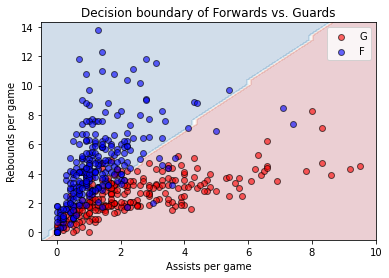

In [18]:
fig, ax = plt.subplots()
CS = ax.contourf(APG, RPG, Y_hat, alpha=0.2, cmap='RdBu')
colors = ['red', 'blue']
unique_categories = np.unique(y)
for color, i in zip(colors, unique_categories):
    xi = apg[y == i]
    yi = rpg[y == i]
    ax.scatter(xi, yi, c=color, edgecolor='k', label="{}".format(pos_dict[i]), alpha=0.6)
ax.set_title("Decision boundary of Forwards vs. Guards")
ax.set_xlabel("Assists per game")
ax.set_ylabel("Rebounds per game")
ax.legend()
plt.show()

此刻我們已經知道深度學習模型如何最適化 $W^{(i)}$ 與 $B^{(i)}$ 的核心技巧反向傳播與前向傳播是如何運作，接著可以開始嘗試使用 Keras 搭建不同層數、單位數、啟動函式與最適化演算方法（Optimizer）的深度學習模型，將其運用在 Keras 內建的 [MNIST 資料](https://keras.io/api/datasets/mnist/) 、[時裝 MNIST 資料](https://keras.io/api/datasets/fashion_mnist/) 上，開啟深度學習的旅程。

## MNIST 資料與時裝 MNIST 資料

[MNIST](http://yann.lecun.com/exdb/mnist/) 是電腦視覺（Computer vision）的「哈囉世界」（"Hello world"）資料。自從 1999 年釋出以來，手寫數字圖片資料集成為區隔類別預測任務的基準，儘管隨著機器學習、深度學習技術的推陳出新，手寫數字圖片依然是研究人員和學生用來測試模型基準的首選，可以透過 `tensorflow.keras.datasets.mnist` 的 `load_data()` 方法載入。

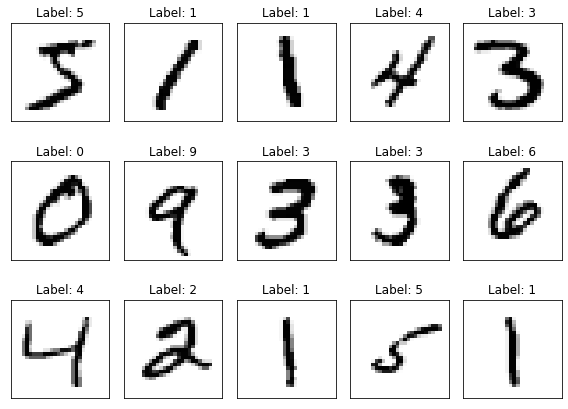

In [19]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
iss = ImshowSubplots(3, 5, (8, 6))
iss.im_show(X_train, y_train)

[時裝 MNIST](https://github.com/zalandoresearch/fashion-mnist) 是由 [Zalando](https://zalando.com/) 釋出的時裝灰階圖片資料集，讀者可以將它當作電腦視覺與深度學習的第二個「哈囉世界」，透過 `tensorflow.keras.datasets.fashion_mnist` 的 `load_data()` 方法載入。

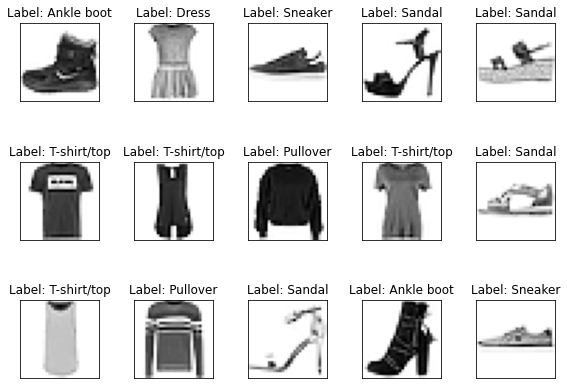

In [20]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
fashion_mnist_labels = {
    0: "T-shirt/top",  # index 0
    1: "Trouser",      # index 1
    2: "Pullover",     # index 2 
    3: "Dress",        # index 3 
    4: "Coat",         # index 4
    5: "Sandal",       # index 5
    6: "Shirt",        # index 6 
    7: "Sneaker",      # index 7 
    8: "Bag",          # index 8 
    9: "Ankle boot"    # index 9
}   
iss = ImshowSubplots(3, 5, (8, 6))
iss.im_show(X_train, y_train, label_dict=fashion_mnist_labels)

In [21]:
w, h = 28, 28
X_train, X_valid = X_train[5000:], X_train[:5000] 
y_train, y_valid = y_train[5000:], y_train[:5000]
X_train = X_train.reshape(X_train.shape[0], w*h)
X_valid = X_valid.reshape(X_valid.shape[0], w*h)
X_test = X_test.reshape(X_test.shape[0], w*h)
y_train = utils.to_categorical(y_train, 10)
y_valid = utils.to_categorical(y_valid, 10)
y_test = utils.to_categorical(y_test, 10)

任意搭建一個不同層數、單位數、啟動函式與最適化演算方法（Optimizer）的深度學習模型。

In [22]:
model = models.Sequential([
    Input(28*28),
    layers.Dense(2**8, activation='sigmoid'),
    layers.Dense(2**8, activation='sigmoid'),
    layers.Dense(2**8, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
n_iters = 5
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          epochs=n_iters)

Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8914 - accuracy: 0.6605 - val_loss: 0.8379 - val_accuracy: 0.6696
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7589 - accuracy: 0.7004 - val_loss: 0.8030 - val_accuracy: 0.6686
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7418 - accuracy: 0.7048 - val_loss: 0.7010 - val_accuracy: 0.7236
Epoch 4/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7399 - accuracy: 0.7080 - val_loss: 0.6857 - val_accuracy: 0.7296
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6985 - accuracy: 0.7251 - val_loss: 0.6714 - val_accuracy: 0.7468


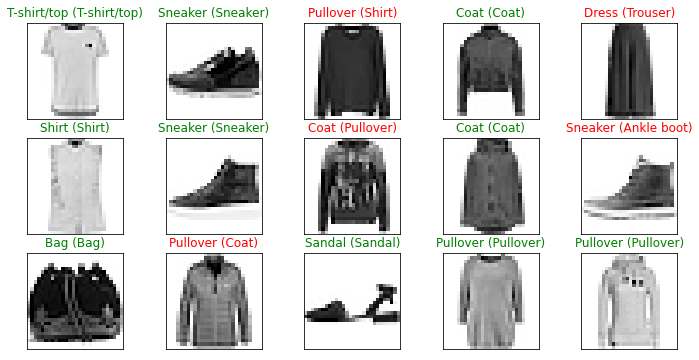

In [26]:
y_hat = model.predict(X_test)
fig, axes = plt.subplots(3, 5, figsize=(12, 6))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    row_idx = i % 3
    col_idx = i // 3
    axes[row_idx, col_idx].imshow(X_test[index].reshape(w, h), cmap="Greys")
    axes[row_idx, col_idx].set_xticks([])
    axes[row_idx, col_idx].set_yticks([])
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    axes[row_idx, col_idx].set_title(
        "{} ({})".format(fashion_mnist_labels[predict_index], fashion_mnist_labels[true_index]),
        color=("green" if predict_index == true_index else "red")
    )
plt.show()

In [27]:
score = model.evaluate(X_valid, y_valid)
loss, accuracy = score
print("Accuracy: {:.2f}%".format(accuracy*100))

157/157 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.7468: 0s - loss: 0.6882 - accuracy: 0.
Accuracy: 74.68%


任意搭建的深度學習模型辨識時裝 MNIST 圖片的表現顯然不是很好，假如讀者對於電腦視覺領域有興趣，可以自行試著利用 Keras 搭建卷積神經網路（Convolutional Neural Network, CNN）來提升準確率，為往後深入認識更多專門作影像辨識的深度學習模型踏出第一步。

## 延伸閱讀

1. Ian Goodfellow ,Yoshua Bengio, and Aaron Courville: Deep Learning (https://www.amazon.com/Deep-Learning-Adaptive-Computation-Machine/dp/0262035618/)
2. Francois Chollet: Deep Learning with Python (https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438)
3. Keras - Getting started (https://keras.io/getting_started/)
4. Deep playground (https://playground.tensorflow.org/)
5. Fashion-MNIST (https://github.com/zalandoresearch/fashion-mnist)